In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from itertools import product
import calendar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.api.types import CategoricalDtype

plt.style.use('seaborn')

<a id='wrangling'></a>
## Data Wrangling

Check ../Bitcoin Data Wrangling.ipynb

<a id='gather'></a>
### Gather

In [3]:
df = pd.read_csv('../data/bitcoin_data.csv', parse_dates=[0], index_col=[0])

In [4]:
df.head()

,currency,open,high,low,close,volume,market_cap
Date,,,,,,,
2013-04-28,bitcoin,135.30,135.98,132.10,134.21,NaN,1.488567e+09
2013-04-29,bitcoin,134.44,147.49,134.00,144.54,NaN,1.603769e+09
2013-04-30,bitcoin,144.00,146.93,134.05,139.00,NaN,1.542813e+09
2013-05-01,bitcoin,139.00,139.89,107.72,116.99,NaN,1.298955e+09
2013-05-02,bitcoin,116.38,125.60,92.28,105.21,NaN,1.168517e+09


<a id='eng_exploration'></a>
## Feature Engineering & Data Exploration

In [5]:
df["returns"] = np.log(df["close"].div(df["close"].shift(1)))

In [6]:
df.head()

,currency,open,high,low,close,volume,market_cap,returns
Date,,,,,,,,
2013-04-28,bitcoin,135.30,135.98,132.10,134.21,NaN,1.488567e+09,NaN
2013-04-29,bitcoin,134.44,147.49,134.00,144.54,NaN,1.603769e+09,0.074151
2013-04-30,bitcoin,144.00,146.93,134.05,139.00,NaN,1.542813e+09,-0.039082
2013-05-01,bitcoin,139.00,139.89,107.72,116.99,NaN,1.298955e+09,-0.172385
2013-05-02,bitcoin,116.38,125.60,92.28,105.21,NaN,1.168517e+09,-0.106130


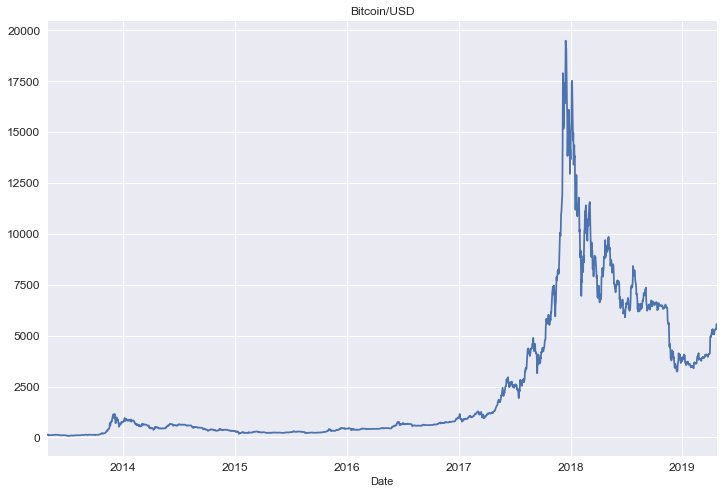

In [7]:
df["close"].plot(figsize = (12, 8), title = "Bitcoin/USD", fontsize = 12)
plt.show()

<a id='strategies_backtest'></a>
## Strategies & Backtesting

#### SMA Crossover Strategy

**- Define Strategy**

In [8]:
sma_s = 50
sma_l = 200

In [9]:
df["SMA_S"] = df.close.rolling(sma_s).mean()

In [10]:
df["SMA_L"] = df.close.rolling(sma_l).mean()

In [11]:
df

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L
Date,,,,,,,,,,
2013-04-28,bitcoin,135.30,135.98,132.10,134.21,NaN,1.488567e+09,NaN,NaN,NaN
2013-04-29,bitcoin,134.44,147.49,134.00,144.54,NaN,1.603769e+09,0.074151,NaN,NaN
2013-04-30,bitcoin,144.00,146.93,134.05,139.00,NaN,1.542813e+09,-0.039082,NaN,NaN
2013-05-01,bitcoin,139.00,139.89,107.72,116.99,NaN,1.298955e+09,-0.172385,NaN,NaN
2013-05-02,bitcoin,116.38,125.60,92.28,105.21,NaN,1.168517e+09,-0.106130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-04-20,bitcoin,5304.16,5358.49,5295.88,5337.89,1.316965e+10,9.424872e+10,0.006405,4427.2038,4545.8199
2019-04-21,bitcoin,5335.88,5359.93,5257.34,5314.53,1.373184e+10,9.384705e+10,-0.004386,4456.2060,4539.8796
2019-04-22,bitcoin,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.015838,4487.2498,4533.9930


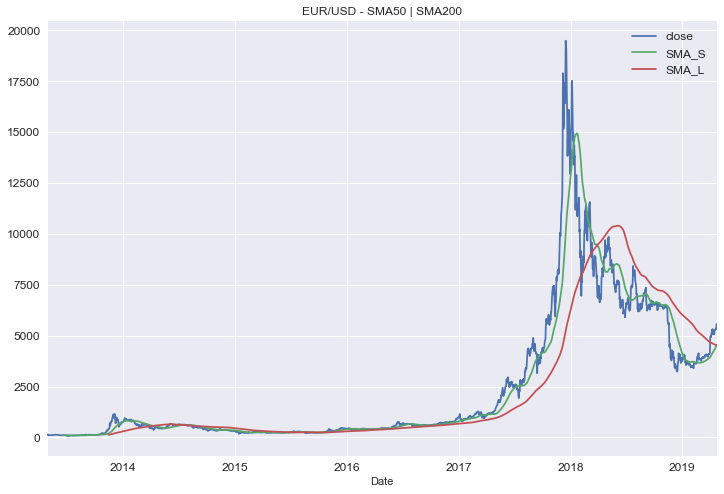

In [12]:
df[["close", "SMA_S", "SMA_L"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [13]:
df.dropna(inplace = True)

In [14]:
df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)

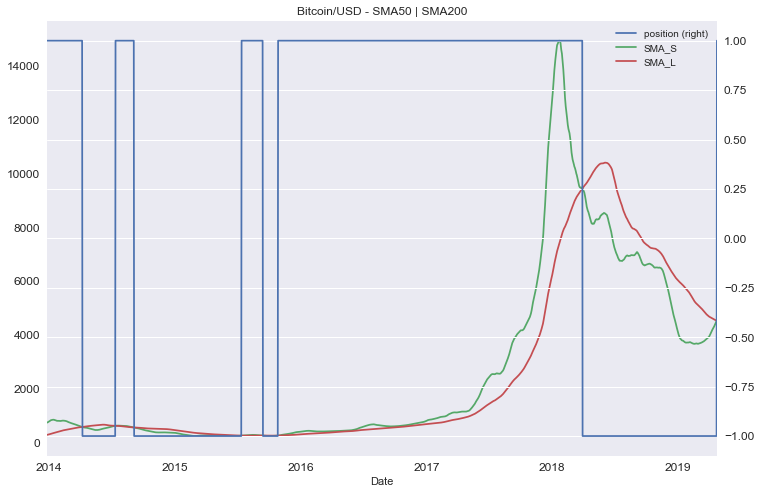

In [15]:
df[["position", "SMA_S", "SMA_L"]].plot(
    figsize = (12, 8),
    title = "Bitcoin/USD - SMA{} | SMA{}".format(sma_s, sma_l),
    fontsize = 12,
    secondary_y = "position"
);


**- Backtesting**

In [16]:
df.head(10)

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position
Date,,,,,,,,,,,
2013-12-27,bitcoin,763.28,777.51,713.60,735.07,46862700.0,8.955395e+09,-0.035955,733.8622,277.86040,1
2013-12-28,bitcoin,737.98,747.06,705.35,727.83,32505800.0,8.869919e+09,-0.009898,741.6566,280.95505,1
2013-12-29,bitcoin,728.05,748.61,714.44,745.05,19011300.0,9.082104e+09,0.023384,749.7754,284.13955,1
2013-12-30,bitcoin,741.35,766.60,740.24,756.13,20707700.0,9.217168e+09,0.014762,758.3656,287.40020,1
2013-12-31,bitcoin,760.32,760.58,738.17,754.01,20897300.0,9.191325e+09,-0.002808,766.5970,290.67035,1
2014-01-01,bitcoin,754.97,775.35,754.97,771.40,22489400.0,9.403308e+09,0.022801,774.8184,294.02740,1
2014-01-02,bitcoin,773.44,820.31,767.21,802.39,38489500.0,9.781074e+09,0.039388,782.7188,297.54180,1
2014-01-03,bitcoin,802.85,834.15,789.12,818.72,37810100.0,9.980135e+09,0.020147,790.6892,301.12690,1
2014-01-04,bitcoin,823.27,859.51,801.67,859.51,38005000.0,1.047736e+10,0.048620,799.5204,304.88745,1


In [17]:
df["returns"] = np.log(df.close.div(df.close.shift(1)))

In [18]:
df["strategy"] = df.position.shift(1) * df["returns"]

In [19]:
df

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position,strategy
Date,,,,,,,,,,,,
2013-12-27,bitcoin,763.28,777.51,713.60,735.07,4.686270e+07,8.955395e+09,NaN,733.8622,277.86040,1,NaN
2013-12-28,bitcoin,737.98,747.06,705.35,727.83,3.250580e+07,8.869919e+09,-0.009898,741.6566,280.95505,1,-0.009898
2013-12-29,bitcoin,728.05,748.61,714.44,745.05,1.901130e+07,9.082104e+09,0.023384,749.7754,284.13955,1,0.023384
2013-12-30,bitcoin,741.35,766.60,740.24,756.13,2.070770e+07,9.217168e+09,0.014762,758.3656,287.40020,1,0.014762
2013-12-31,bitcoin,760.32,760.58,738.17,754.01,2.089730e+07,9.191325e+09,-0.002808,766.5970,290.67035,1,-0.002808
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-20,bitcoin,5304.16,5358.49,5295.88,5337.89,1.316965e+10,9.424872e+10,0.006405,4427.2038,4545.81990,-1,-0.006405
2019-04-21,bitcoin,5335.88,5359.93,5257.34,5314.53,1.373184e+10,9.384705e+10,-0.004386,4456.2060,4539.87960,-1,0.004386
2019-04-22,bitcoin,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.015838,4487.2498,4533.99300,-1,-0.015838


In [20]:
df.dropna(inplace = True)

In [21]:
df[["returns", "strategy"]].sum() # absolute performance

returns     2.006130
strategy    2.304485
dtype: float64

In [22]:
df[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns      7.434489
strategy    10.019022
dtype: float64

In [23]:
df[["returns", "strategy"]].mean() * 252 # annualized return

returns     0.260054
strategy    0.298730
dtype: float64

In [24]:
df[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.618517
strategy    0.618447
dtype: float64

In [25]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)

In [26]:
df

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,
2013-12-28,bitcoin,737.98,747.06,705.35,727.83,3.250580e+07,8.869919e+09,-0.009898,741.6566,280.95505,1,-0.009898,0.990151,0.990151
2013-12-29,bitcoin,728.05,748.61,714.44,745.05,1.901130e+07,9.082104e+09,0.023384,749.7754,284.13955,1,0.023384,1.013577,1.013577
2013-12-30,bitcoin,741.35,766.60,740.24,756.13,2.070770e+07,9.217168e+09,0.014762,758.3656,287.40020,1,0.014762,1.028650,1.028650
2013-12-31,bitcoin,760.32,760.58,738.17,754.01,2.089730e+07,9.191325e+09,-0.002808,766.5970,290.67035,1,-0.002808,1.025766,1.025766
2014-01-01,bitcoin,754.97,775.35,754.97,771.40,2.248940e+07,9.403308e+09,0.022801,774.8184,294.02740,1,0.022801,1.049424,1.049424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-20,bitcoin,5304.16,5358.49,5295.88,5337.89,1.316965e+10,9.424872e+10,0.006405,4427.2038,4545.81990,-1,-0.006405,7.261744,10.257359
2019-04-21,bitcoin,5335.88,5359.93,5257.34,5314.53,1.373184e+10,9.384705e+10,-0.004386,4456.2060,4539.87960,-1,0.004386,7.229964,10.302445
2019-04-22,bitcoin,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.015838,4487.2498,4533.99300,-1,-0.015838,7.345382,10.140563


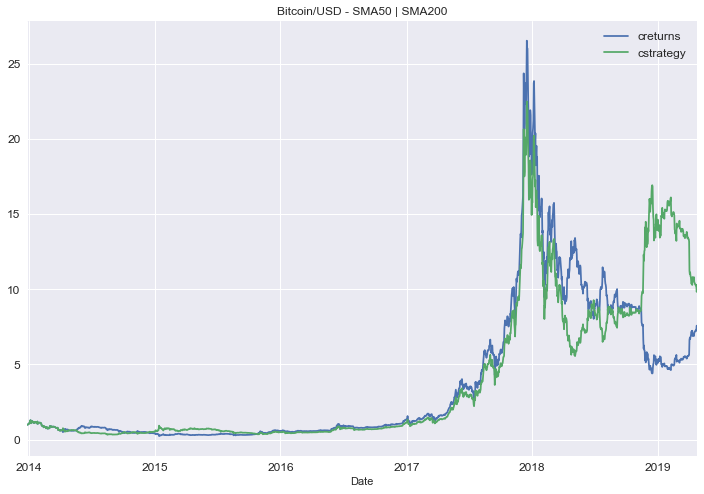

In [27]:
df[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "Bitcoin/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [28]:
outperf = df.cstrategy.iloc[-1] - df.creturns.iloc[-1]
outperf

2.58453274385766

**- optimization**

In [29]:
def run_strategy(df, SMA):
    df_copy = df.copy()
    df_copy["returns"] = np.log(df_copy.close.div(df_copy.close.shift(1)))
    df_copy["SMA_S"] = df_copy.close.rolling(int(SMA[0])).mean()
    df_copy["SMA_L"] = df_copy.close.rolling(int(SMA[1])).mean()
    df_copy.dropna(inplace = True)
    
    df_copy["position"] = np.where(df_copy["SMA_S"] > df_copy["SMA_L"], 1, -1)
    df_copy["strategy"] = df_copy.position.shift(1) * df_copy["returns"]
    df_copy.dropna(inplace = True)
    
    df_copy["creturns"] = df_copy["returns"].cumsum().apply(np.exp)
    df_copy["cstrategy"] = df_copy["strategy"].cumsum().apply(np.exp)
    
    return df_copy

In [30]:
run_strategy(df, (50, 200))

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,
2014-07-16,bitcoin,622.01,623.09,615.33,616.80,1.318240e+07,8.034807e+09,-0.007736,618.7334,613.93710,1,-0.007736,0.992294,0.992294
2014-07-17,bitcoin,616.54,626.29,608.40,623.09,1.657670e+07,8.119395e+09,0.010146,619.6540,613.32730,1,0.010146,1.002413,1.002413
2014-07-18,bitcoin,622.37,629.21,620.47,628.78,1.415810e+07,8.196213e+09,0.009090,620.8660,612.69055,1,0.009090,1.011567,1.011567
2014-07-19,bitcoin,629.17,629.17,624.60,628.52,7.222030e+06,8.195600e+09,-0.000414,621.1298,612.06310,1,-0.000414,1.011149,1.011149
2014-07-20,bitcoin,628.56,628.56,622.78,623.90,5.760120e+06,8.137808e+09,-0.007378,621.1342,611.32560,1,-0.007378,1.003716,1.003716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-20,bitcoin,5304.16,5358.49,5295.88,5337.89,1.316965e+10,9.424872e+10,0.006405,4427.2038,4545.81990,-1,-0.006405,8.587477,23.191745
2019-04-21,bitcoin,5335.88,5359.93,5257.34,5314.53,1.373184e+10,9.384705e+10,-0.004386,4456.2060,4539.87960,-1,0.004386,8.549896,23.293684
2019-04-22,bitcoin,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.015838,4487.2498,4533.99300,-1,-0.015838,8.686385,22.927672


In [31]:
run_strategy(df, (10, 50))

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,
2014-02-16,bitcoin,651.30,665.10,584.17,616.63,4.006170e+07,7.650359e+09,-0.054118,660.892,798.7306,-1,0.054118,0.947321,1.055609
2014-02-17,bitcoin,614.23,656.95,607.31,626.27,3.194840e+07,7.772386e+09,0.015512,652.279,796.3550,-1,-0.015512,0.962131,1.039360
2014-02-18,bitcoin,627.16,645.76,612.54,626.60,2.001510e+07,7.779035e+09,0.000527,647.547,793.7644,-1,-0.000527,0.962637,1.038813
2014-02-19,bitcoin,625.97,631.77,618.70,623.03,1.389780e+07,7.737830e+09,-0.005714,641.560,791.1448,-1,0.005714,0.957153,1.044765
2014-02-20,bitcoin,623.09,627.73,556.14,556.14,4.690500e+07,6.909539e+09,-0.113575,629.071,786.8396,-1,0.113575,0.854391,1.170425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-20,bitcoin,5304.16,5358.49,5295.88,5337.89,1.316965e+10,9.424872e+10,0.006405,5191.304,4427.2038,1,0.006405,8.200532,51.996134
2019-04-21,bitcoin,5335.88,5359.93,5257.34,5314.53,1.373184e+10,9.384705e+10,-0.004386,5216.308,4456.2060,1,-0.004386,8.164644,51.768585
2019-04-22,bitcoin,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.015838,5247.291,4487.2498,1,0.015838,8.294982,52.595008


In [32]:
run_strategy(df, (22, 252))

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,
2014-09-06,bitcoin,483.34,488.60,483.00,484.83,1.060140e+07,6.417501e+09,0.003078,496.324545,600.705357,-1,-0.003078,1.003083,0.996927
2014-09-07,bitcoin,485.13,488.07,482.28,482.28,8.994050e+06,6.385590e+09,-0.005273,494.623182,599.662619,-1,0.005273,0.997807,1.002198
2014-09-08,bitcoin,481.81,489.83,468.79,474.60,3.023800e+07,6.285638e+09,-0.016053,493.841364,598.545437,-1,0.016053,0.981917,1.018416
2014-09-09,bitcoin,474.88,477.38,467.78,475.26,2.144780e+07,6.296102e+09,0.001390,494.468636,597.439286,-1,-0.001390,0.983283,1.017001
2014-09-10,bitcoin,475.48,487.47,475.14,479.36,2.278780e+07,6.352286e+09,0.008590,494.201364,596.280397,-1,-0.008590,0.991766,1.008303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-20,bitcoin,5304.16,5358.49,5295.88,5337.89,1.316965e+10,9.424872e+10,0.006405,5007.893636,4970.423849,1,-0.006405,11.043758,28.264355
2019-04-21,bitcoin,5335.88,5359.93,5257.34,5314.53,1.373184e+10,9.384705e+10,-0.004386,5062.796818,4966.423214,1,-0.004386,10.995428,28.140663
2019-04-22,bitcoin,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.015838,5121.613636,4962.858929,1,0.015838,11.170956,28.589894


In [33]:
from scipy.optimize import brute

In [34]:
brute(lambda x: -run_strategy(df, x)[["strategy"]].sum().apply(np.exp)[0], ((10, 50, 1), (100, 252, 1)))

array([ 27., 157.])

In [35]:
run_strategy(df, (27, 157))[["strategy"]].sum().apply(np.exp)[0]

143.26720172598564

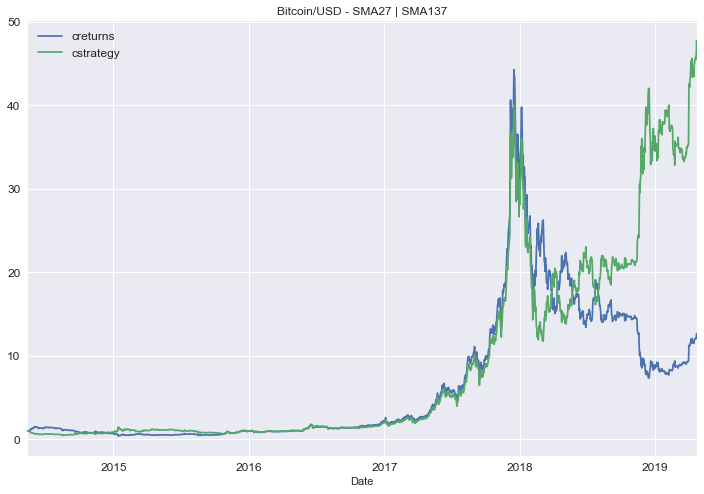

In [36]:
sma = (27, 137)

df_strategy = run_strategy(df, sma)

df_strategy[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "Bitcoin/USD - SMA{} | SMA{}".format(sma[0], sma[1]), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

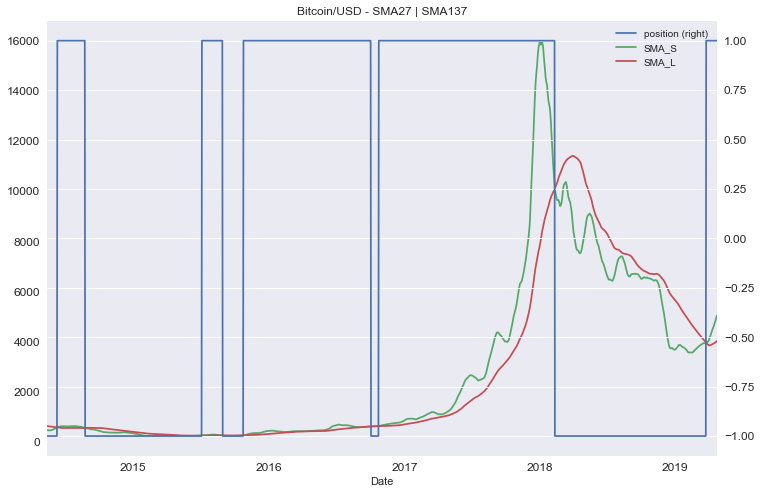

In [37]:
df_strategy[["position", "SMA_S", "SMA_L"]].plot(
    figsize = (12, 8),
    title = "Bitcoin/USD - SMA{} | SMA{}".format(sma[0], sma[1]),
    fontsize = 12,
    secondary_y = "position"
);


In [38]:
class SMABacktester:
    ''' Class for the vectorized backtesting of SMA-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
        
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new SMA parameters
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates SMA parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, data, SMA_S, SMA_L):
        self.data = data
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.results = None 
        self.update_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = BTC/USD, SMA_S = {}, SMA_L = {})".format(self.SMA_S, self.SMA_L)
        
    def update_data(self):
        ''' Retrieves and prepares the data.
        '''
        data = self.data
        data["returns"] = np.log(data.close / data.close.shift(1))
        data["SMA_S"] = data["close"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["close"].rolling(self.SMA_L).mean()
        self.data = data
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        if SMA_S is not None:
            self.SMA_S = int(SMA_S)
            self.data["SMA_S"] = self.data["close"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = int(SMA_L)
            self.data["SMA_L"] = self.data["close"].rolling(self.SMA_L).mean()
            
    def test_strategy(self, sma=None, plot_results=True):
        ''' Backtests the trading strategy.
        '''
        if sma is not None and isinstance(sma, (tuple, list, type(np.array([])))):
            self.set_parameters(sma[0], sma[1])
        
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data[["creturns", "cstrategy", "position"]]
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        
        if plot_results:
            self.plot_results()
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy first.")
        else:
            title = "BTC/USD | SMA_S = {} | SMA_L = {}".format(self.SMA_S, self.SMA_L)
            self.results.plot(title=title, figsize=(12, 8), secondary_y='position')
        
    def update_and_run(self, SMA, plot_results=False):
        ''' Updates SMA parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        return -self.test_strategy(SMA, plot_results=plot_results)[0]
    
    def optimize_parameters(self, SMA1_range, SMA2_range):
        ''' Finds global maximum given the SMA parameter ranges.

        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        
        
        return opt, -self.update_and_run(opt, plot_results=True)



In [581]:
trainer = SMABacktester(df.copy(), 50, 200)

(22.652869, 13.861109)

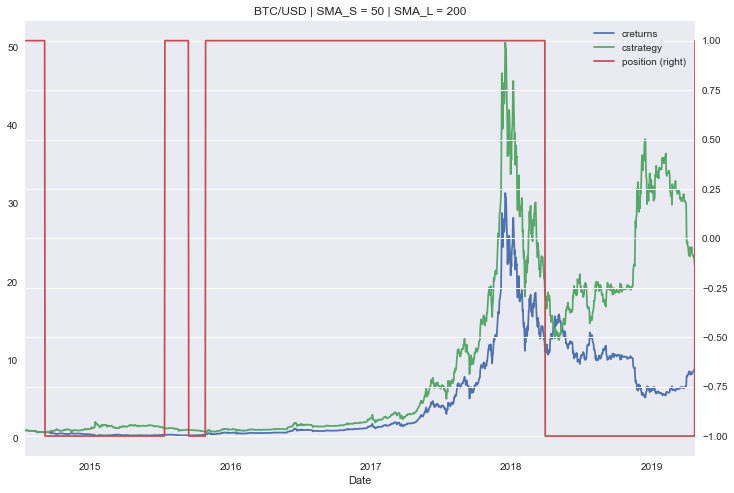

In [582]:
trainer.test_strategy()

In [41]:
trainer.SMA_S, trainer.SMA_L

(50, 200)

(58.958294, 36.183797)

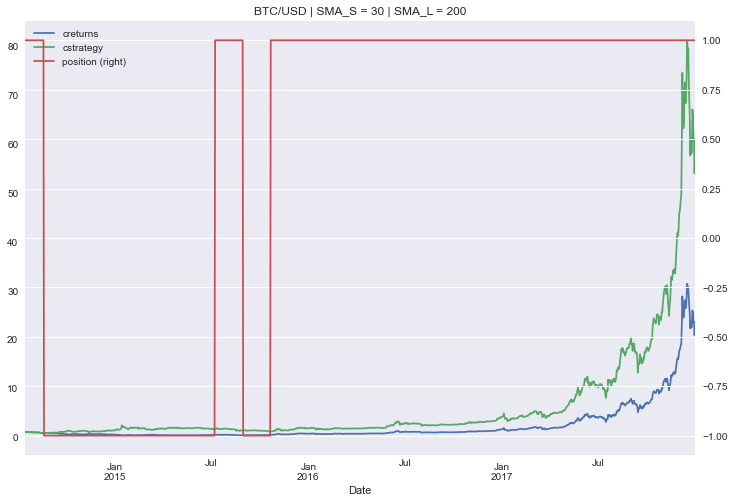

In [42]:
trainer.test_strategy(np.array([30, 200]))

(1.366338, 0.634455)

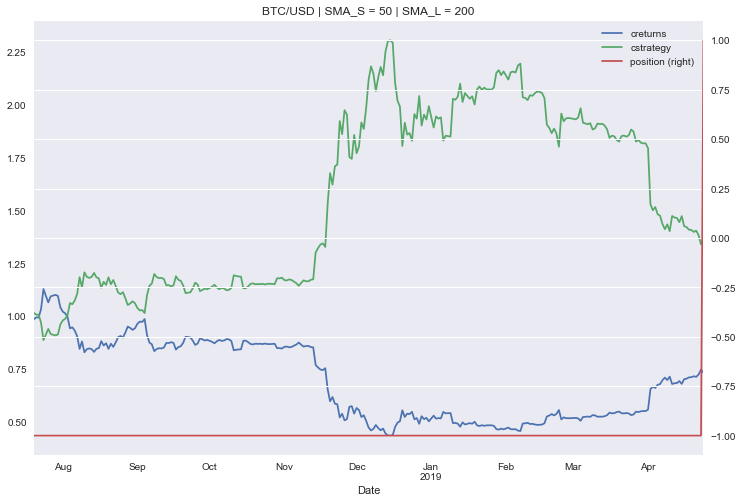

In [43]:
tester = SMABacktester(df.loc["2018":].copy(), 50, 200)
tester.test_strategy()

(array([ 40., 224.]), 80.93512)

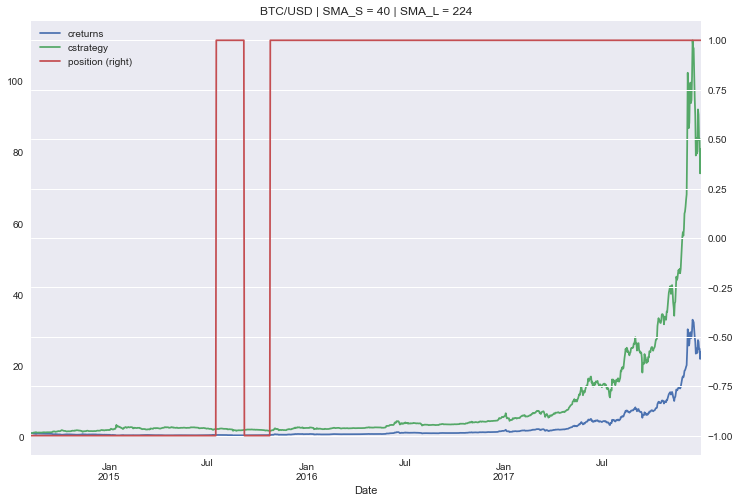

In [44]:
trainer.optimize_parameters((25, 50, 1), (100, 250, 1))

(1.154377, 0.288109)

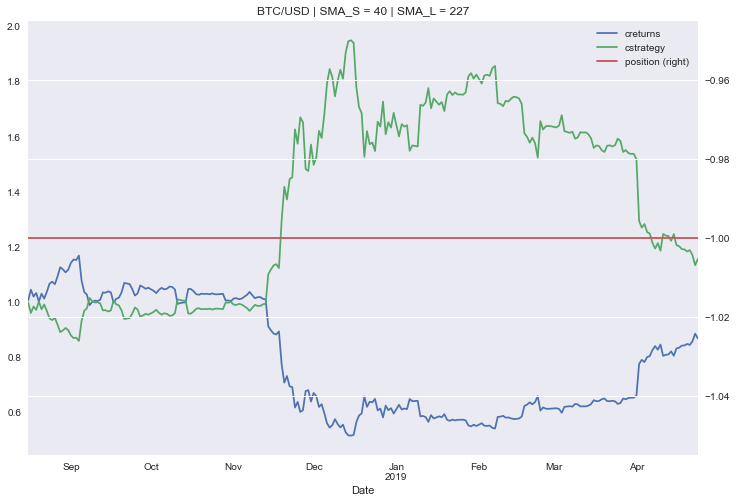

In [45]:
tester = SMABacktester(df.loc["2018":].copy(), 40, 227)
tester.test_strategy()

(1.488646, 0.756763)

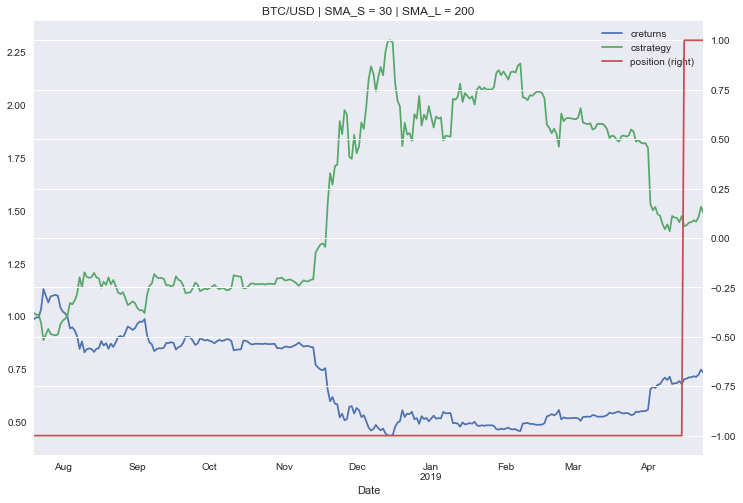

In [46]:
tester.test_strategy((30, 200))

#### Contrarian Strategy

In [692]:
class ConBacktester:
    ''' Class for the vectorized backtesting of simple Contrarian trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    tc: float
        proportional transaction costs per trade
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    test_strategy:
        runs the backtest for the contrarian-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
    '''
    
    def __init__(self, data, tc):
        self.data = data
        self.tc = tc
        self.results = None
        self._update_data()
        
    def __repr__(self):
        return "ConBacktester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def _update_data(self):
        ''' Retrieves and prepares the data.
        '''
        data = self.data.dropna().copy()
        data["returns"] = np.log(data.close / data.close.shift(1))
        self.data = data
        
    def test_strategy(self, window = 1, plot_results=True):
        ''' Backtests the trading strategy.
        '''
        self.window = window
        data = self.data.copy().dropna()
        data["position"] = np.sign(data["returns"].rolling(window).mean())
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        
        if plot_results:
            self.plot_results()
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "BTC/USD | Window = {} | TC = {}".format(self.window, self.tc)
            self.results[["creturns", "cstrategy", "position"]].plot(title=title, figsize=(12, 8), secondary_y='position')

In [693]:
contr = ConBacktester(df, 0)

(117.699925, 110.885873)

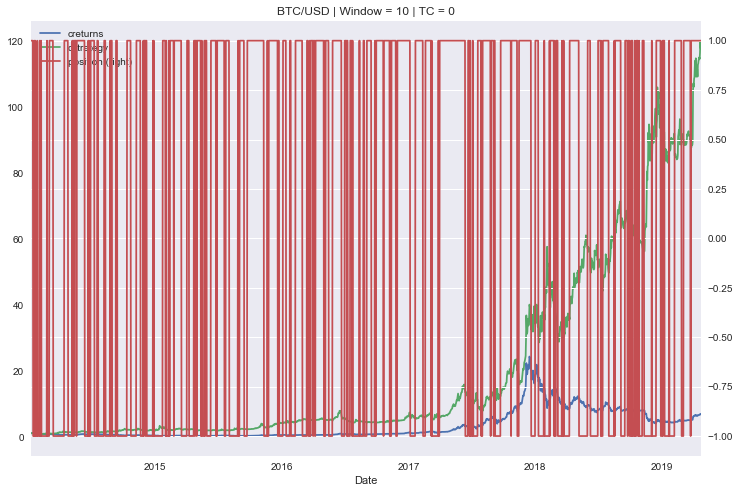

In [697]:
contr.test_strategy(10)

In [50]:
contr.results

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy,trades
Date,,,,,,,,,,,,,,,
2013-12-30,bitcoin,741.35,766.60,740.24,756.13,2.070770e+07,9.217168e+09,0.014762,758.3656,287.40020,-1.0,-0.014762,1.014871,0.985346,0.0
2013-12-31,bitcoin,760.32,760.58,738.17,754.01,2.089730e+07,9.191325e+09,-0.002808,766.5970,290.67035,1.0,0.002808,1.012026,0.988117,2.0
2014-01-01,bitcoin,754.97,775.35,754.97,771.40,2.248940e+07,9.403308e+09,0.022801,774.8184,294.02740,-1.0,0.022801,1.035367,1.010906,2.0
2014-01-02,bitcoin,773.44,820.31,767.21,802.39,3.848950e+07,9.781074e+09,0.039388,782.7188,297.54180,-1.0,-0.039388,1.076961,0.971863,0.0
2014-01-03,bitcoin,802.85,834.15,789.12,818.72,3.781010e+07,9.980135e+09,0.020147,790.6892,301.12690,-1.0,-0.020147,1.098879,0.952478,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-20,bitcoin,5304.16,5358.49,5295.88,5337.89,1.316965e+10,9.424872e+10,0.006405,4427.2038,4545.81990,-1.0,-0.006405,7.164472,0.105056,0.0
2019-04-21,bitcoin,5335.88,5359.93,5257.34,5314.53,1.373184e+10,9.384705e+10,-0.004386,4456.2060,4539.87960,1.0,0.004386,7.133119,0.105518,2.0
2019-04-22,bitcoin,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.015838,4487.2498,4533.99300,-1.0,0.015838,7.246990,0.107203,2.0


#### Mean Reversion

In [51]:
class MeanRevBacktester:
    ''' Class for the vectorized backtesting of SMA-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
        
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new SMA parameters
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates SMA parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, data, ma, sd):
        
        self.data = data.copy().dropna()
        self.ma = ma
        self.sd = sd
        self.results = None 
        self.update_data()
        
    def __repr__(self):
        return "MeanRevBacktester(symbol = BTC/USD, ma = {}, sd = {})".format(self.ma, self.sd)
        
    def update_data(self):
        ''' Retrieves and prepares the data.
        '''
        
        data = self.data
        data["returns"] = np.log(data.close / data.close.shift(1))
        data["sma"] = data["close"].rolling(self.ma).mean()
        data["upper"] = data["sma"] + data["close"].rolling(self.ma).std() * self.sd
        data["lower"] = data["sma"] - data["close"].rolling(self.ma).std() * self.sd
        self.data = data
        
    def set_parameters(self, ma = None, sd = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        if ma is not None:
            self.ma = int(ma)
        if sd is not None:
            self.sd = sd
                
        self.update_data()
            
    def test_strategy(self, ma_sd_pair=None, plot_results=True):
        ''' Backtests the trading strategy.
        '''
        if ma_sd_pair is not None and isinstance(ma_sd_pair, (tuple, list, type(np.array([])))):
            self.set_parameters(*ma_sd_pair)
        
        data = self.data.copy().dropna()
        data["distance"] = data["close"] - data["sma"]
        data["position"] = np.where(data["close"] > data["upper"], -1, np.nan)
        data["position"] = np.where(data["close"] < data["lower"], 1, data["position"])
        data["position"] = np.where(data["distance"] * data["distance"].shift(1) < 0, 0, data["position"])
        data["position"] = data["position"].ffill().fillna(0)
        
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        # absolute performance of the strategy
        try:
            perf = data["cstrategy"].iloc[-1]
            outperf = perf - data["creturns"].iloc[-1]
        except IndexError:
            print(self)
        # out-/underperformance of strategy
        
        if plot_results:
            self.plot_results()
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy first.")
        else:
            title = "BTC/USD | ma = {} | sd = {}".format(self.ma, self.sd)
            self.results[["upper", "lower", "close", "sma", "creturns", "cstrategy", "position"]].plot(title=title, figsize=(12, 8), secondary_y=['upper', 'lower', "close", "sma"])
        
    def update_and_run(self, ma_sd_pair, plot_results=False):
        ''' Updates SMA parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        return -self.test_strategy(ma_sd_pair, plot_results=plot_results)[0]
    
    def optimize_parameters(self, ma_range, sd_range):
        ''' Finds global maximum given the SMA parameter ranges.

        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (ma_range, sd_range), finish=None)
        
        
        return opt, -self.update_and_run(opt, plot_results=True)



In [52]:
mean_rev = MeanRevBacktester(df, 30, 2)

(0.043647, -6.129394)

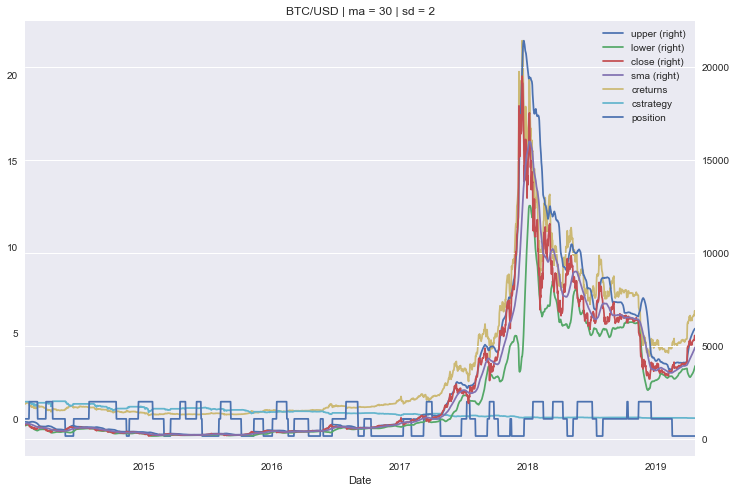

In [53]:
mean_rev.test_strategy()

(array([99.,  4.]), 3.01745)

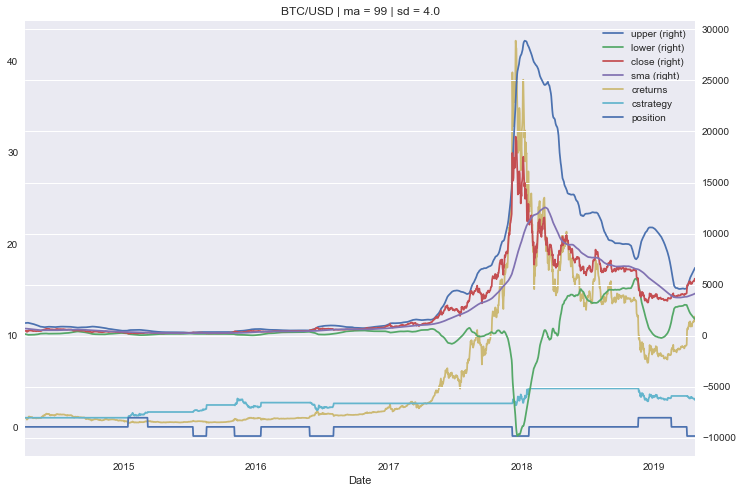

In [54]:
mean_rev.optimize_parameters((20, 100, 1), (1, 5, 1))

In [55]:
mean_rev_2 = MeanRevBacktester(df, 100, 3)

(2.935036, -8.488665)

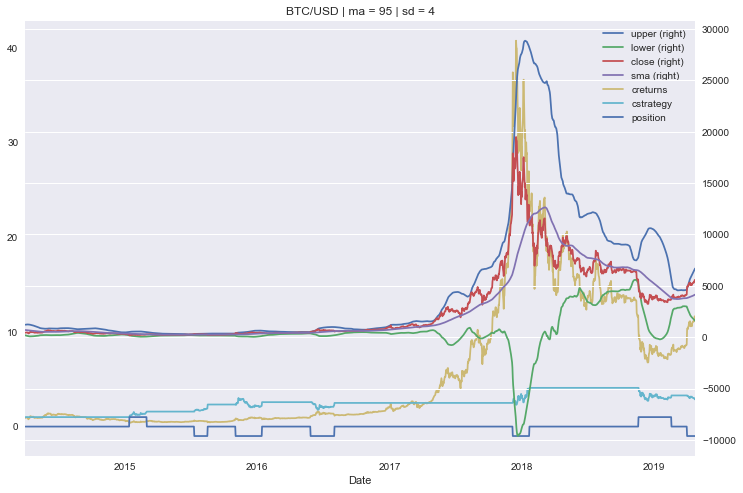

In [56]:
mean_rev_2.test_strategy((95, 4))

In [57]:
data = df.copy()

In [58]:
data

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,
2013-12-28,bitcoin,737.98,747.06,705.35,727.83,3.250580e+07,8.869919e+09,-0.009898,741.6566,280.95505,1,-0.009898,0.990151,0.990151
2013-12-29,bitcoin,728.05,748.61,714.44,745.05,1.901130e+07,9.082104e+09,0.023384,749.7754,284.13955,1,0.023384,1.013577,1.013577
2013-12-30,bitcoin,741.35,766.60,740.24,756.13,2.070770e+07,9.217168e+09,0.014762,758.3656,287.40020,1,0.014762,1.028650,1.028650
2013-12-31,bitcoin,760.32,760.58,738.17,754.01,2.089730e+07,9.191325e+09,-0.002808,766.5970,290.67035,1,-0.002808,1.025766,1.025766
2014-01-01,bitcoin,754.97,775.35,754.97,771.40,2.248940e+07,9.403308e+09,0.022801,774.8184,294.02740,1,0.022801,1.049424,1.049424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-20,bitcoin,5304.16,5358.49,5295.88,5337.89,1.316965e+10,9.424872e+10,0.006405,4427.2038,4545.81990,-1,-0.006405,7.261744,10.257359
2019-04-21,bitcoin,5335.88,5359.93,5257.34,5314.53,1.373184e+10,9.384705e+10,-0.004386,4456.2060,4539.87960,-1,0.004386,7.229964,10.302445
2019-04-22,bitcoin,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.015838,4487.2498,4533.99300,-1,-0.015838,7.345382,10.140563


In [59]:
ma = 30
sd = 2

data["returns"] = np.log(data.close / data.close.shift(1))
data["sma"] = data["close"].rolling(ma).mean()
data["upper"] = data["sma"] + data["close"].rolling(ma).std() * sd
data["lower"] = data["sma"] - data["close"].rolling(ma).std() * sd

<AxesSubplot:xlabel='Date'>

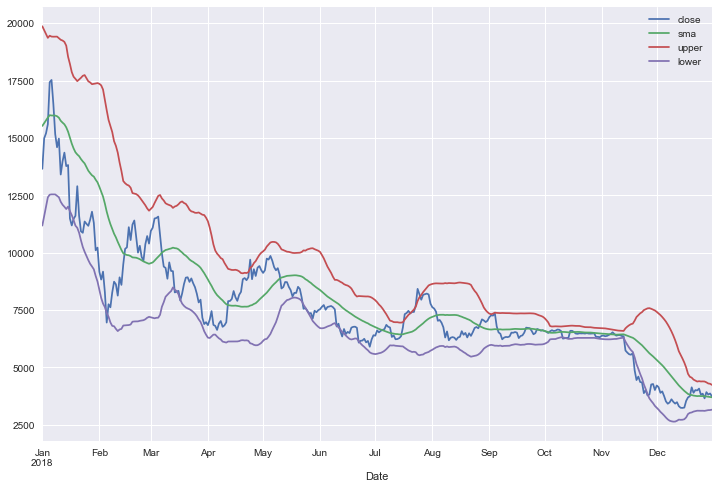

In [60]:
data.loc["2018", ["close", "sma", "upper", "lower"]].plot(figsize=(12, 8))

In [61]:
data["distance"] = data["close"] - data["sma"]
data["position"] = np.where(data["close"] > data["upper"], -1, np.nan)
data["position"] = np.where(data["close"] < data["lower"], 1, data["position"])
data["position"] = np.where(data["distance"] * data["distance"].shift(1) < 0, 0, data["position"])
data["position"] = data["position"].ffill().fillna(0)
data.loc["2018"].head(10)

# data["strategy"] = data["position"].shift(1) * data["returns"]

,currency,open,high,low,close,volume,market_cap,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy,sma,upper,lower,distance
Date,,,,,,,,,,,,,,,,,,
2018-01-01,bitcoin,14112.2,14112.2,13154.7,13657.2,1.029120e+10,2.291192e+11,-0.035900,12772.7288,6238.45540,0.0,-0.035900,18.579455,15.749357,15524.313333,19865.789093,11182.837573,-1867.113333
2018-01-02,bitcoin,13625.0,15444.6,13163.6,14982.1,1.684660e+10,2.513779e+11,0.092589,12941.1810,6300.77310,0.0,0.092589,20.381868,17.277220,15646.276667,19695.105800,11597.447533,-664.176667
2018-01-03,bitcoin,14978.2,15572.8,14844.5,15201.0,1.687190e+10,2.550806e+11,0.014505,13112.4860,6363.49870,0.0,0.014505,20.679663,17.529653,15764.403333,19528.412516,12000.394151,-563.403333
2018-01-04,bitcoin,15270.7,15739.7,14522.2,15599.2,2.178320e+10,2.617953e+11,0.025858,13278.1592,6428.75325,0.0,0.025858,21.221380,17.988854,15887.153333,19360.931789,12413.374878,-287.953333
2018-01-05,bitcoin,15477.2,17705.2,15202.8,17429.5,2.384090e+10,2.925441e+11,0.110945,13469.3154,6502.95275,0.0,0.110945,23.711347,20.099539,15991.753333,19455.680353,12527.826314,1437.746667
2018-01-06,bitcoin,17462.1,17712.4,16764.6,17527.0,1.831460e+10,2.942174e+11,0.005578,13665.6756,6576.97880,0.0,0.005578,23.843988,20.211975,15979.330000,19417.519621,12541.140379,1547.670000
2018-01-07,bitcoin,17527.3,17579.6,16087.7,16477.6,1.586600e+10,2.766348e+11,-0.061741,13839.4246,6645.92130,0.0,-0.061741,22.416369,19.001817,15976.270000,19412.449344,12540.090656,501.330000
2018-01-08,bitcoin,16476.2,16537.9,14208.2,15170.1,1.841390e+10,2.547153e+11,-0.082675,13982.0968,6708.24475,0.0,-0.082675,20.637626,17.494020,15976.000000,19412.440092,12539.559908,-805.900000
2018-01-09,bitcoin,15123.7,15497.5,14424.0,14595.4,1.666000e+10,2.450958e+11,-0.038620,14109.9920,6767.49720,0.0,-0.038620,19.855796,16.831281,15947.333333,19415.941369,12478.725298,-1351.933333


In [62]:
data.position.value_counts()

 0.0    835
-1.0    647
 1.0    462
Name: position, dtype: int64

<AxesSubplot:xlabel='Date'>

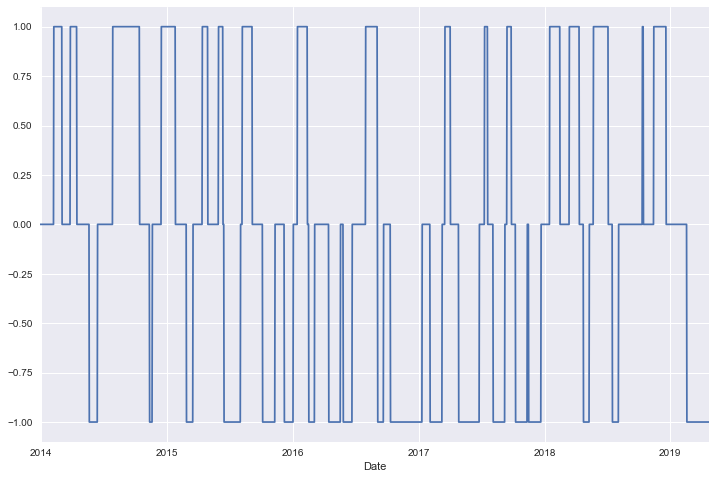

In [63]:
data.position.plot(figsize=(12, 8))

In [784]:
class IterativeBase():

    def __init__(self, data, start, end, amount, price_col='close', trading_costs=0):
        self.symbol = 'BTC'
        self.original_data = data
        self.start = start
        self.end = end
        self.results = None 
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
        self.price_col = price_col
        self.trading_costs = trading_costs / 100
        
        self.update_data()
        
    def update_data(self):
        ''' Retrieves and prepares the data.
        '''
        data = self.original_data.copy()
        data = data.loc[self.start:self.end]
        data["returns"] = np.log(data.close / data.close.shift(1))
        self.data = data
        
    def get_values(self, bar):
        price = self.data.iloc[bar][self.price_col]
        date = self.data.index[bar].date()
        
        return date, price
        
    def print_current_balance(self, bar):
        date = self.get_values(bar)[0]
        print("{} |  Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def plot_data(self, cols = None):  
        if cols is None:
            cols = "close"
        self.data[cols].plot(figsize = (12, 8), title = 'BTC/USD')
        
    def buy_instrument(self, bar, units = None, amount = None):
        
        date, price = self.get_values(bar)
        
        price = price * (1 + self.trading_costs)
        
        if units is None:
            units = amount / price
                        
        self.current_balance -= units * price
        self.units += units
        self.trades += 1
        print(f"{date} |  Buying {round(units, 4)} {self.symbol} for {round(price, 5)}")
        
    def sell_instrument(self, bar, units = None, amount = None):
        
        date, price = self.get_values(bar)
        
        price = price * (1 - self.trading_costs)
        
        if units is None:
            units = amount / price
            
        self.current_balance += units * price
        self.units -= units
        self.trades += 1
        print(f"{date} |  Selling {round(units, 4)} {self.symbol} for {round(price, 5)}")
        
    def print_current_position_value(self, bar):
        date, price = self.get_values(bar)
        
        cpv = self.units * price
        print(f"{date} |  Current Position Value = {round(cpv, 2)}")
        
    def print_current_nav(self, bar):
        date, price = self.get_values(bar)
        
        nav = self.current_balance + self.units * price
        print(f"{date} |  Net Asset Value = {round(nav, 2)}")
        
    def close_pos(self, bar):
        date, price = self.get_values(bar)
        
        print(75 * "-")
        print("{} |  +++ CLOSING FINAL POSITION +++".format(date))
                
        if self.units <= 0:
            self.buy_instrument(bar, units=-self.units)
        else:
            self.sell_instrument(bar, units=self.units)
        
        perf = (self.current_balance - self.initial_balance) / self.initial_balance * 100
        self.print_current_balance(bar)
        print("{} |  net performance (%) = {}".format(date, round(perf, 2) ))
        print("{} |  number of trades executed = {}".format(date, self.trades))
        print(75 * "-")
        
    def plot_results(self, title, cols):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        
        self.data[cols].plot(title=title, figsize=(12, 8), secondary_y=["positions"])
    
        

In [713]:
bc = IterativeBase(df, "2012-12-31", "2020-06-30", 100000)

In [714]:
bc.print_current_balance(1)

2013-12-29 |  Current Balance: 100000


In [502]:
bc.buy_instrument(0, units = 10)

2013-12-28 |  Buying 10 BTC for 727.83


In [503]:
bc.units

10

In [504]:
bc.print_current_balance(0)

2013-12-28 |  Current Balance: 92721.7


In [505]:
100000 - 10 * 727.83

92721.7

In [506]:
bc.buy_instrument(1, amount = 5000)

2013-12-29 |  Buying 6.711 BTC for 745.05


In [507]:
5000 / 745.05

6.710958996040534

In [508]:
bc.units

16.710958996040535

In [509]:
bc.print_current_balance(1)

2013-12-29 |  Current Balance: 87721.7


In [510]:
bc.print_current_position_value(0)

2013-12-28 |  Current Position Value = 12162.74


In [511]:
87721.7 + 12162.74

99884.44

In [512]:
bc.print_current_nav(0)

2013-12-28 |  Net Asset Value = 99884.44


In [513]:
bc.print_current_position_value(1)

2013-12-29 |  Current Position Value = 12450.5


In [514]:
12450.5 + 87721.7

100172.2

In [515]:
bc.print_current_nav(1)

2013-12-29 |  Net Asset Value = 100172.2


In [516]:
bc.sell_instrument(1, units = 200)

2013-12-29 |  Selling 200 BTC for 745.05


In [517]:
bc.print_current_nav(1)

2013-12-29 |  Net Asset Value = 100172.2


In [518]:
bc.units

-183.28904100395945

In [519]:
bc.print_current_balance(1)

2013-12-29 |  Current Balance: 236731.7


In [520]:
bc.print_current_position_value(1)

2013-12-29 |  Current Position Value = -136559.5


In [521]:
bc.close_pos(2)

---------------------------------------------------------------------------
2013-12-30 |  +++ CLOSING FINAL POSITION +++
2013-12-30 |  Buying 183.289 BTC for 756.13
2013-12-30 |  Current Balance: 98141.36
2013-12-30 |  net performance (%) = -1.86
2013-12-30 |  number of trades executed = 4
---------------------------------------------------------------------------


In [452]:
bc.units

0.0

In [522]:
bc = IterativeBase(df, "2012-12-31", "2020-06-30", 100000, trading_costs=0.1)

In [523]:
bc.print_current_balance(1)

2013-12-29 |  Current Balance: 100000


In [524]:
bc.buy_instrument(0, units = 10)

2013-12-28 |  Buying 10 BTC for 728.55783


In [525]:
bc.units

10

In [526]:
bc.print_current_balance(0)

2013-12-28 |  Current Balance: 92714.42


In [527]:
100000 - 10 * 728.55783

92714.4217

In [528]:
bc.buy_instrument(1, amount = 5000)

2013-12-29 |  Buying 6.7043 BTC for 745.79505


In [529]:
5000 / 745.05

6.710958996040534

In [530]:
bc.units

16.704254741299238

In [531]:
bc.print_current_balance(1)

2013-12-29 |  Current Balance: 87714.42


In [532]:
bc.print_current_position_value(1)

2013-12-29 |  Current Position Value = 12445.5


In [533]:
bc.print_current_nav(1)

2013-12-29 |  Net Asset Value = 100159.93


In [534]:
bc.sell_instrument(1, units = 200)

2013-12-29 |  Selling 200 BTC for 744.30495


In [535]:
bc.print_current_nav(1)

2013-12-29 |  Net Asset Value = 100010.92


In [536]:
bc.units

-183.29574525870078

In [537]:
bc.print_current_balance(1)

2013-12-29 |  Current Balance: 236575.41


In [538]:
bc.print_current_position_value(1)

2013-12-29 |  Current Position Value = -136564.5


In [539]:
bc.close_pos(2)

---------------------------------------------------------------------------
2013-12-30 |  +++ CLOSING FINAL POSITION +++
2013-12-30 |  Buying 183.2957 BTC for 756.88613
2013-12-30 |  Current Balance: 97841.4
2013-12-30 |  net performance (%) = -2.16
2013-12-30 |  number of trades executed = 4
---------------------------------------------------------------------------


In [856]:
class IterativeBacktest(IterativeBase):

    # helper method
    def go_long(self, bar, units = None, amount = None):
        if self.position == -1:
            self.buy_instrument(bar, units = -self.units) # if short position, go neutral first
        if units:
            self.buy_instrument(bar, units = units)
        elif amount:
            if amount == "all":
                amount = self.current_balance
            self.buy_instrument(bar, amount = amount) # go long

    # helper method
    def go_short(self, bar, units = None, amount = None):
        if self.position == 1:
            self.sell_instrument(bar, units = self.units) # if long position, go neutral first
        if units:
            self.sell_instrument(bar, units = units)
        elif amount:
            if amount == "all":
                amount = self.current_balance
            self.sell_instrument(bar, amount = amount) # go short
            
    def reset_object(self):
        # reset 
        self.position = 0  # initial neutral position
        self.positions = []
        self.trades = 0  # no trades yet
        self.current_balance = self.initial_balance  # reset initial capital
        self.update_data() # reset dataset
        
    def calculate_cum_results(self, title, plot_results=True):
                
        self.data["positions"] = self.positions
        self.data["strategy"] = self.data.positions.shift(1) * self.data.returns
        
        self.data["cstrategy"] = self.data["strategy"].cumsum().apply(np.exp)
        self.data["creturns"] = self.data["returns"].cumsum().apply(np.exp)
        
        self.data["trades"] = self.data.positions.diff().fillna(0).abs()
        
#         self.data.strategy = self.data.strategy - self.data.trades * self.tc

        # absolute performance of the strategy
        perf = self.data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - self.data["creturns"].iloc[-1]
        
        if plot_results:
            self.plot_results(title, ["creturns", "cstrategy", "positions"])
        
        return round(perf, 6), round(outperf, 6)
    
    def test_sma_strategy(self, SMA_S, SMA_L, plot_results=True):
        
        # nice printout
        stm = "Testing SMA strategy | {} | SMA_S = {} & SMA_L = {}".format(self.symbol, SMA_S, SMA_L)
        print("-" * 75)
        print(stm)
        print("-" * 75)
        
        self.reset_object()
        
        # prepare data        
        self.data["SMA_S"] = self.data[self.price_col].rolling(SMA_S).mean()
        self.data["SMA_L"] = self.data[self.price_col].rolling(SMA_L).mean()
        self.data.dropna(inplace = True)
        
        for bar, (timestamp, row) in enumerate(self.data.iloc[:-1].iterrows()):
            if row["SMA_S"] > row["SMA_L"]:
                if self.position in [0, -1]:
                    self.go_long(bar, amount="all")
                    self.position = 1
            elif row["SMA_S"] < row["SMA_L"]:
                if self.position in [0, 1]:
                    self.go_short(bar, amount="all")
                    self.position = -1
                    
            self.positions.append(self.position)
                    
        self.close_pos(bar + 1)
        
        self.positions.append(0)
        
        title = "Simple Moving Average Strategy: BTC/USD | sma_s = {} | sms_l = {}".format(SMA_S, SMA_L)
        
        return self.calculate_cum_results(title, plot_results)
        
    def test_con_strategy(self, window = 1, plot_results=True):
        ''' Backtests the trading strategy.
        '''
        
        # nice printout
        stm = "Testing Contrarian strategy | {} | window: {}".format(self.symbol, window)
        print("-" * 75)
        print(stm)
        print("-" * 75)
        
        self.reset_object()
        
        self.data["rolling_returns"] = self.data["returns"].rolling(window, min_periods=1).mean()
        self.data.dropna(inplace = True)
        
        # Contrarian strategy
        for bar, (timestamp, row) in enumerate(self.data.iloc[:-1].iterrows()): # all bars (except the last bar)
            if self.data["rolling_returns"].iloc[bar] >= 0: #signal to go long
                if self.position in [0, -1]:
                    self.go_long(bar, amount = "all") # go long with full amount
                    self.position = 1  # long position
            elif self.data["rolling_returns"].iloc[bar] < 0: #signal to go short
                if self.position in [0, 1]:
                    self.go_short(bar, amount = "all") # go short with full amount
                    self.position = -1 # short position
                    
            self.positions.append(self.position)
            
        self.close_pos(bar+1) # close position at the last bar
        
        self.positions.append(0)
                    
        title = "Momentum Strategy: {} | window = {}".format(self.symbol, window)
        
        return self.calculate_cum_results(title, plot_results)
    
    def test_boll_strategy(self, SMA, dev, plot_results=True):
        ''' Test a mean-reversion strategy (bollinger) with SMA and dev.
        '''
        
        # nice printout
        stm = "Testing Bollinger Bands Strategy: {} | SMA = {} & dev = {}".format(self.symbol, SMA, dev)
        print("-" * 75)
        print(stm)
        print("-" * 75)
        
        self.reset_object()
        
        # prepare data
        self.data["sma"] = self.data[self.price_col].rolling(SMA).mean()
        self.data["lower"] = self.data["sma"] - self.data[self.price_col].rolling(SMA).std() * dev
        self.data["upper"] = self.data["sma"] + self.data[self.price_col].rolling(SMA).std() * dev
        self.data.dropna(inplace = True) 
        
        # Bollinger strategy
        for bar, (timestamp, row) in enumerate(self.data.iloc[:-1].iterrows()): # all bars (except the last bar)
            if self.position == 0: # when neutral
                if row[self.price_col] < row["lower"]: # signal to go long
                    self.go_long(bar, amount = "all") # go long with full amount
                    self.position = 1  # long position
                elif row[self.price_col] > row["upper"]: # signal to go Short
                    self.go_short(bar, amount = "all") # go short with full amount
                    self.position = -1 # short position
            elif self.position == 1: # when long
                if row[self.price_col] > row["sma"]:
                    if row[self.price_col] > row["upper"]: # signal to go short
                        self.go_short(bar, amount = "all") # go short with full amount
                        self.position = -1 # short position
                    else:
                        self.sell_instrument(bar, units = self.units) # go neutral
                        self.position = 0
            elif self.position == -1: # when short
                if row[self.price_col] < row["sma"]:
                    if row[self.price_col] < row["lower"]: # signal to go long
                        self.go_long(bar, amount = "all") # go long with full amount
                        self.position = 1 # long position
                    else:
                        self.buy_instrument(bar, units = -self.units) # go neutral
                        self.position = 0
            
            self.positions.append(self.position)
            
        self.close_pos(bar+1) # close position at the last bar
        
        self.positions.append(0)
        
        title = "Bollinger Bands Strategy: {} | SMA = {} | dev = {}".format(self.symbol, SMA, dev)
        
        return self.calculate_cum_results(title, plot_results)

In [854]:
bc = IterativeBacktest(df, "2012-12-31", "2020-06-30", 100000, trading_costs=0)

---------------------------------------------------------------------------
Testing SMA strategy | BTC | SMA_S = 30 & SMA_L = 200
---------------------------------------------------------------------------
2014-07-15 |  Selling 160.8777 BTC for 621.59
2014-07-16 |  Buying 160.8777 BTC for 616.8
2014-07-16 |  Buying 163.3765 BTC for 616.8
2014-08-20 |  Selling 163.3765 BTC for 511.98
2014-08-20 |  Selling 163.3765 BTC for 511.98
2015-07-09 |  Buying 163.3765 BTC for 269.23
2015-07-09 |  Buying 457.9918 BTC for 269.23
2015-08-31 |  Selling 457.9918 BTC for 230.06
2015-08-31 |  Selling 457.9918 BTC for 230.06
2015-10-22 |  Buying 457.9918 BTC for 274.02
2015-10-22 |  Buying 311.044 BTC for 274.02
2018-03-28 |  Selling 311.044 BTC for 7954.48
2018-03-28 |  Selling 311.044 BTC for 7954.48
2019-04-16 |  Buying 311.044 BTC for 5235.56
2019-04-16 |  Buying 634.1053 BTC for 5235.56
---------------------------------------------------------------------------
2019-04-24 |  +++ CLOSING FINAL POSITI

(52.537479, 43.713494)

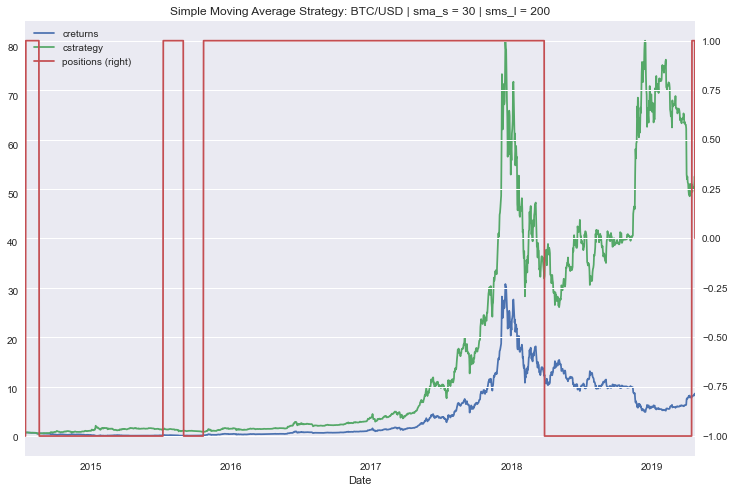

In [841]:
bc.test_sma_strategy(30, 200)

In [832]:
bc.data.trades.value_counts()

0.0    1737
2.0       7
1.0       1
Name: trades, dtype: int64

---------------------------------------------------------------------------
Testing Contrarian strategy | BTC | window: 10
---------------------------------------------------------------------------
2013-12-29 |  Buying 134.2192 BTC for 745.05
2014-01-14 |  Selling 134.2192 BTC for 833.27
2014-01-14 |  Selling 134.2192 BTC for 833.27
2014-01-17 |  Buying 134.2192 BTC for 814.64
2014-01-17 |  Buying 140.3581 BTC for 814.64
2014-01-18 |  Selling 140.3581 BTC for 840.0
2014-01-18 |  Selling 140.3581 BTC for 840.0
2014-01-19 |  Buying 140.3581 BTC for 870.96
2014-01-19 |  Buying 130.3795 BTC for 870.96
2014-01-21 |  Selling 130.3795 BTC for 863.91
2014-01-21 |  Selling 130.3795 BTC for 863.91
2014-01-26 |  Buying 130.3795 BTC for 885.28
2014-01-26 |  Buying 124.085 BTC for 885.28
2014-01-27 |  Selling 124.085 BTC for 771.39
2014-01-27 |  Selling 124.085 BTC for 771.39
2014-02-02 |  Buying 124.085 BTC for 825.37
2014-02-02 |  Buying 107.8544 BTC for 825.37
2014-02-04 |  Selling 107.8544 BTC

2016-03-24 |  Selling 921.3471 BTC for 416.39
2016-03-24 |  Selling 921.3471 BTC for 416.39
2016-03-25 |  Buying 921.3471 BTC for 417.18
2016-03-25 |  Buying 917.8576 BTC for 417.18
2016-04-01 |  Selling 917.8576 BTC for 417.96
2016-04-01 |  Selling 917.8576 BTC for 417.96
2016-04-02 |  Buying 917.8576 BTC for 420.87
2016-04-02 |  Buying 905.165 BTC for 420.87
2016-04-06 |  Selling 905.165 BTC for 423.41
2016-04-06 |  Selling 905.165 BTC for 423.41
2016-04-08 |  Buying 905.165 BTC for 420.35
2016-04-08 |  Buying 918.3436 BTC for 420.35
2016-05-02 |  Selling 918.3436 BTC for 444.67
2016-05-02 |  Selling 918.3436 BTC for 444.67
2016-05-03 |  Buying 918.3436 BTC for 450.3
2016-05-03 |  Buying 895.3799 BTC for 450.3
2016-05-04 |  Selling 895.3799 BTC for 446.72
2016-05-04 |  Selling 895.3799 BTC for 446.72
2016-05-07 |  Buying 895.3799 BTC for 458.54
2016-05-07 |  Buying 849.2187 BTC for 458.54
2016-05-16 |  Selling 849.2187 BTC for 454.16
2016-05-16 |  Selling 849.2187 BTC for 454.16
2016

2019-03-06 |  Buying 1045.8597 BTC for 3903.94
2019-03-26 |  Selling 1045.8597 BTC for 3985.08
2019-03-26 |  Selling 1045.8597 BTC for 3985.08
2019-03-27 |  Buying 1045.8597 BTC for 4087.07
2019-03-27 |  Buying 993.6623 BTC for 4087.07
---------------------------------------------------------------------------
2019-04-24 |  +++ CLOSING FINAL POSITION +++
2019-04-24 |  Selling 993.6623 BTC for 5464.87
2019-04-24 |  Current Balance: 5430235.35
2019-04-24 |  net performance (%) = 5330.24
2019-04-24 |  number of trades executed = 482
---------------------------------------------------------------------------


(126.696651, 119.188208)

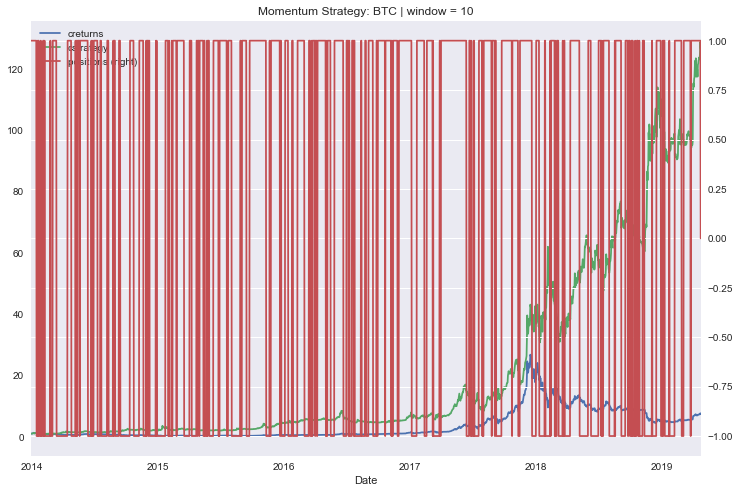

In [823]:
bc.test_con_strategy(10)

In [864]:
trades = bc.data.trades.value_counts()
trades[2.0] * 2 + trades[1.0] + (1 if bc.data.positions[0] != 0 else 0)

74

---------------------------------------------------------------------------
Testing Bollinger Bands Strategy: BTC | SMA = 30 & dev = 2
---------------------------------------------------------------------------
2014-02-07 |  Buying 140.3706 BTC for 712.4
2014-03-03 |  Selling 140.3706 BTC for 667.76
2014-03-27 |  Buying 198.909 BTC for 471.24
2014-04-15 |  Selling 198.909 BTC for 515.59
2014-05-21 |  Selling 208.5436 BTC for 491.77
2014-06-14 |  Buying 208.5436 BTC for 577.36
2014-07-28 |  Buying 144.6264 BTC for 585.69
2014-10-14 |  Selling 144.6264 BTC for 400.87
2014-11-12 |  Selling 136.8788 BTC for 423.56
2014-11-20 |  Buying 136.8788 BTC for 357.84
2014-12-16 |  Buying 204.7699 BTC for 327.06
2015-01-26 |  Selling 204.7699 BTC for 273.47
2015-02-27 |  Selling 220.6139 BTC for 253.83
2015-03-18 |  Buying 220.6139 BTC for 256.3
2015-04-14 |  Buying 253.0275 BTC for 219.16
2015-04-30 |  Selling 253.0275 BTC for 236.15
2015-05-31 |  Buying 259.5788 BTC for 230.19
2015-06-13 |  Sellin

(0.044464, -6.357605)

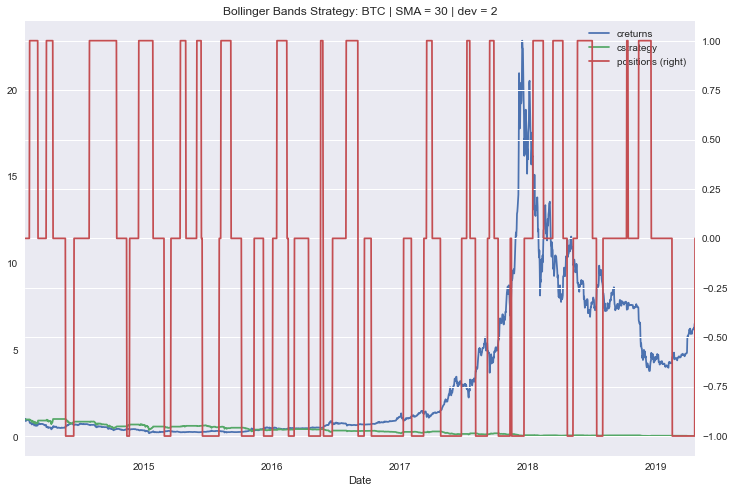

In [857]:
bc.test_boll_strategy(30, 2)